In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib.colors as mplcolors
import matplotlib.ticker as ptick
import matplotlib.colorbar as mplcolorbar
import matplotlib.cm as mplcm
from matplotlib.ticker import AutoMinorLocator
import math
import Leadangle_wave as Wave
from Leadangle_fit_JunoUVS import eqwlong_err
from Leadangle_fit_JunoUVS import TEB_transit
from Leadangle_fit_JunoUVS import create_argmesh
from column_mass import calc as column_calc
from UniversalColor import UniversalColor
from SharedX import ShareXaxis
from legend_shadow import legend_shadow

UC = UniversalColor()
UC.set_palette()

F = ShareXaxis()
F.fontsize = 20
F.fontname = 'Liberation Sans Narrow'
F.set_default()

# F.set_figparams()
# F.initialize()

Importing Library
done


In [2]:
exname = ['003/20250516_047', '003/20250516_068', '003/20250516_078']
TARGET_MOON = 'Io'
PJ_num = ['3', '19', '28S']

Ai_num = 3
ni_num = 50
Ti_num = 60

In [8]:
# %% Constants
dchi_1s = 2.30     # デルタchi2の1シグマ区間
dchi_2s = 6.17     # デルタchi2の2シグマ区間
dchi_3s = 11.8     # デルタchi2の3シグマ区間

MU0 = 1.26E-6            # 真空中の透磁率
AMU2KG = 1.66E-27        # 原子質量をkgに変換するファクタ [kg]
RJ = 71492E+3            # JUPITER RADIUS [m]
MJ = 1.90E+27            # JUPITER MASS [kg]
C = 2.99792E+8           # LIGHT SPEED [m/s]
G = 6.67E-11             # 万有引力定数  [m^3 kg^-1 s^-2]

Psyn_io = (12.89)*3600      # Moon's synodic period [sec]
Psyn_eu = (11.22)*3600      # Moon's synodic period [sec]
Psyn_ga = (10.53)*3600      # Moon's synodic period [sec]

if TARGET_MOON == 'Io':
    Psyn = Psyn_io
    r_moon = 5.9*RJ
    xticks = np.array([1, 10, 100, 500, 1000, 5000])
elif TARGET_MOON == 'Europa':
    Psyn = Psyn_eu
    r_moon = 9.4*RJ
    xticks = np.array([1, 10, 100, 500, 1000, 5000])
elif TARGET_MOON == 'Ganymede':
    Psyn = Psyn_ga
    r_moon = 15.0*RJ
    xticks = np.array([1, 10, 100, 1000])

In [9]:
ni_1d = np.loadtxt('results/fit/'+exname[0]+'/params_ni.txt')
Ti_1d = np.loadtxt('results/fit/'+exname[0]+'/params_Ti.txt')
chi2_1d = np.loadtxt('results/fit/'+exname[0]+'/params_chi2.txt')
ni_3d = ni_1d.reshape(ni_num, Ai_num, Ti_num)
Ti_3d = Ti_1d.reshape(ni_num, Ai_num, Ti_num)
chi2_3d = chi2_1d.reshape(ni_num, Ai_num, Ti_num)
eqlead_est = np.loadtxt('results/fit/'+exname[0]+'/eqlead_est.txt')

# 保存されているカイ2乗値は自由度で割ってしまっているので
# ここで元に戻す
chi2_3d = chi2_3d*(eqlead_est.shape[0]-3)

In [10]:
col_massdens_1d = np.loadtxt(
    'results/column_mass/003/20250516_'+TARGET_MOON+'/col_massdens_1d.txt')
col_massdens_3d = col_massdens_1d.reshape(ni_num, Ai_num, Ti_num)

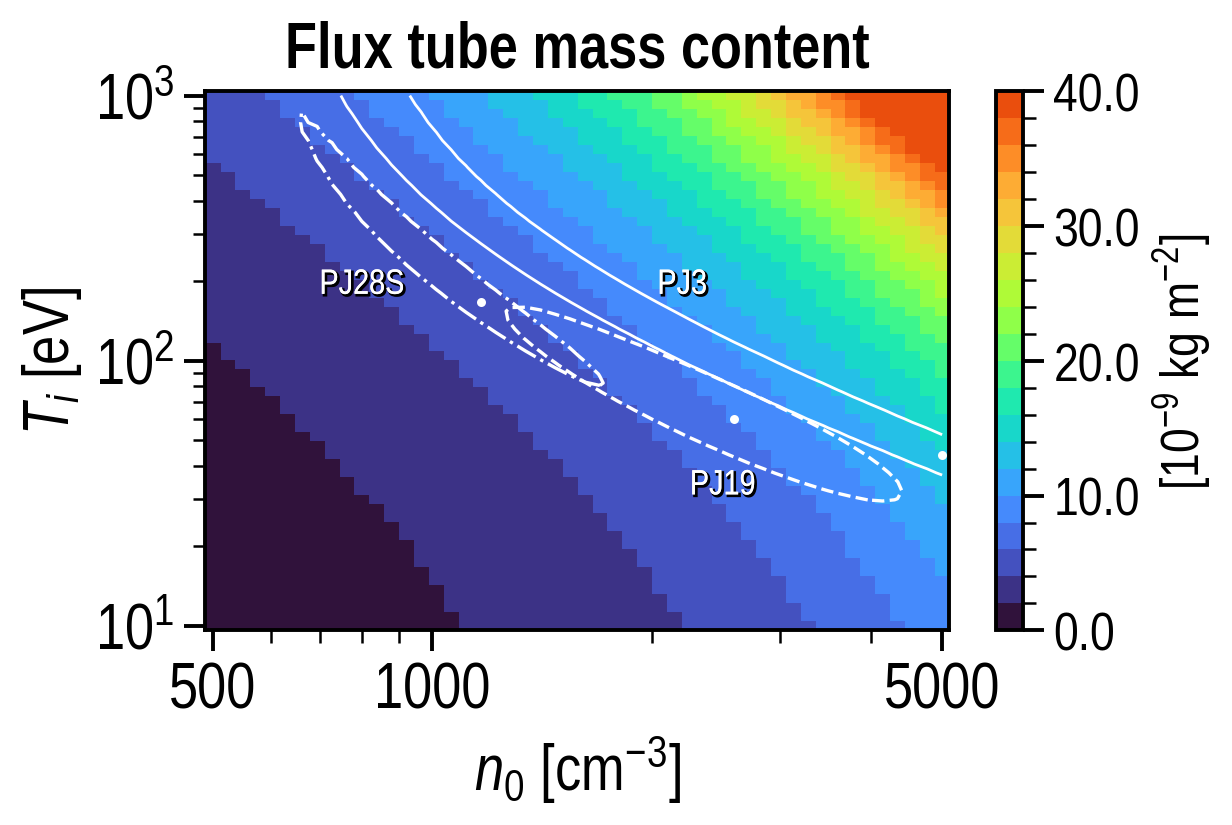

In [59]:
F = ShareXaxis()
F.fontsize = 23
F.fontname = 'Liberation Sans Narrow'
F.set_default()

fig, ax = plt.subplots(figsize=(6., 3.5),
                       dpi=200)
fig.subplots_adjust(hspace=0.8)

F.fig, F.ax = fig, ax

#
#
# THIRD AXIS
z_value_99 = col_massdens_3d[:, 1, :].T
z_value_99 = z_value_99*1E+9
x_value = ni_3d[:, 1, :].T
y_value = Ti_3d[:, 1, :].T

ax.set_title('Flux tube mass content', weight='bold')
ax.set_xlabel(r'$n_0$ [cm$^{-3}$]')
ax.set_ylabel(r'$T_i$ [eV]')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
linestyles = ['-', '--', '-.']
linewidth = [1.0, 1.2, 1.2]
for i in range(3):
    ni_1d = np.loadtxt('results/fit/'+exname[i]+'/params_ni.txt')
    Ti_1d = np.loadtxt('results/fit/'+exname[i]+'/params_Ti.txt')
    chi2_1d = np.loadtxt('results/fit/'+exname[i]+'/params_chi2.txt')
    ni_3d = ni_1d.reshape(ni_num, Ai_num, Ti_num)
    Ti_3d = Ti_1d.reshape(ni_num, Ai_num, Ti_num)
    chi2_3d = chi2_1d.reshape(ni_num, Ai_num, Ti_num)
    eqlead_est = np.loadtxt('results/fit/'+exname[i]+'/eqlead_est.txt')

    # 保存されているカイ2乗値は自由度で割ってしまっているので
    # ここで元に戻す
    chi2_3d = chi2_3d*(eqlead_est.shape[0]-3)
    z_value = chi2_3d[:, 1, :].T-np.min(chi2_3d[:, 1, :])

    cn = ax.contour(x_value, y_value, z_value,
                    levels=[11.8],
                    # levels=[21.36, 30.48, 40.29],
                    colors='w',
                    linewidths=linewidth[i],
                    linestyles=linestyles[i],
                    zorder=2)

    # Location of the chi2 minimum
    x_best = x_value[np.where(z_value == np.min(z_value))]
    y_best = y_value[np.where(z_value == np.min(z_value))]
    ax.scatter(x_best, y_best,
               s=5, color='w', zorder=2.5)

cmap_turbo = plt.get_cmap('turbo')
N_color = 20
dN = int(256/N_color-1)
color_list = []
for i in range(N_color):
    color_list += [cmap_turbo(i*dN)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=40)

p = ax.pcolormesh(x_value,
                  y_value,
                  z_value_99,
                  cmap=cmap,
                  norm=norm,
                  zorder=0.5)

# Setting for color bar
cmap_turbo = plt.get_cmap('turbo')
cmap_turbo(0)
color_list = [cmap_turbo(0), cmap_turbo(63), cmap_turbo(127), cmap_turbo(195)]
cmap = mplcolors.ListedColormap(color_list)
norm = mplcolors.Normalize(vmin=0, vmax=1)

cax = fig.colorbar(p, ax=ax)
cax.ax.set_yticks(np.linspace(0, 40, 5))
cax.ax.set_yticklabels(np.linspace(0, 40, 5), fontsize=F.fontsize*0.85)
cax.ax.yaxis.set_minor_locator(ptick.AutoMinorLocator(5))
cax.ax.set_ylabel(r'[$10^{-9}$ kg m$^{-2}$]', fontsize=F.fontsize*0.85)

F.textbox(ax_idx=0, x=2200, y=200,
          text='PJ3', fontsize=F.fontsize*0.55,
          horizontalalignment='center',
          facealpha=0., edgecolor='none')
F.textbox(ax_idx=0, x=2500, y=35,
          text='PJ19', fontsize=F.fontsize*0.55,
          horizontalalignment='center',
          facealpha=0., edgecolor='none')
F.textbox(ax_idx=0, x=800, y=200,
          text='PJ28S', fontsize=F.fontsize*0.55,
          horizontalalignment='center',
          facealpha=0., edgecolor='none')

fig.savefig('img/ftmc_map_PJ3_19_28S.pdf', bbox_inches='tight')
plt.show()